# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#lets load the data set in our system 

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('loan_Application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data preprocessing

In [4]:
df.Loan_ID.value_counts()

LP001715    1
LP001282    1
LP002734    1
LP002114    1
LP002319    1
           ..
LP001716    1
LP001151    1
LP002087    1
LP002960    1
LP002585    1
Name: Loan_ID, Length: 614, dtype: int64

Observation:
    1. Every data is unique.
    2. There is no use of id column in m.l 

In [5]:
df = df.drop('Loan_ID', axis=1)
#because there is no unique ness in feature column

# EDA Process
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [16]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Observations:
    
    1.We can see there are total 12 columns including target variable, all of them are self explanatory.
    
    2.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [17]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

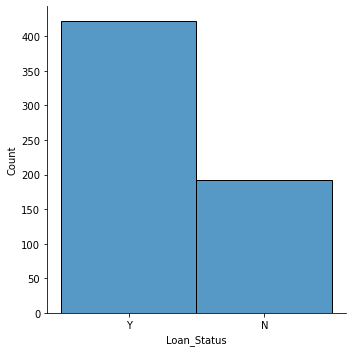

In [19]:
sns.displot(df['Loan_Status'])

Observations:

    1.As seen from above distribution plot that classes are not equally distributed,Hence we have to use imbalance learn for data balancing.

In [10]:
df.shape

(614, 12)

observations:

    1. Total of 614 rows are present in dataset and 12 feature columns after data preprocessing.

In [11]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

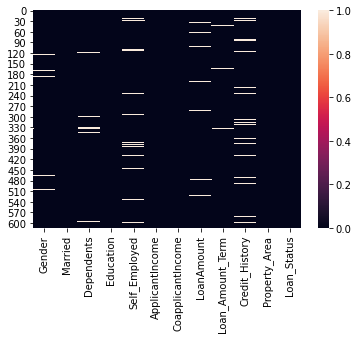

In [12]:
import seaborn as sns
sns.heatmap(df.isnull())

observations:

    1.As observe from the above there is  null values count,we can easily visulize in this heat map plotting.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

# Spliting the Dataset in Categorical and Int data type.

In [13]:
Categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Analyze values assigned to columns

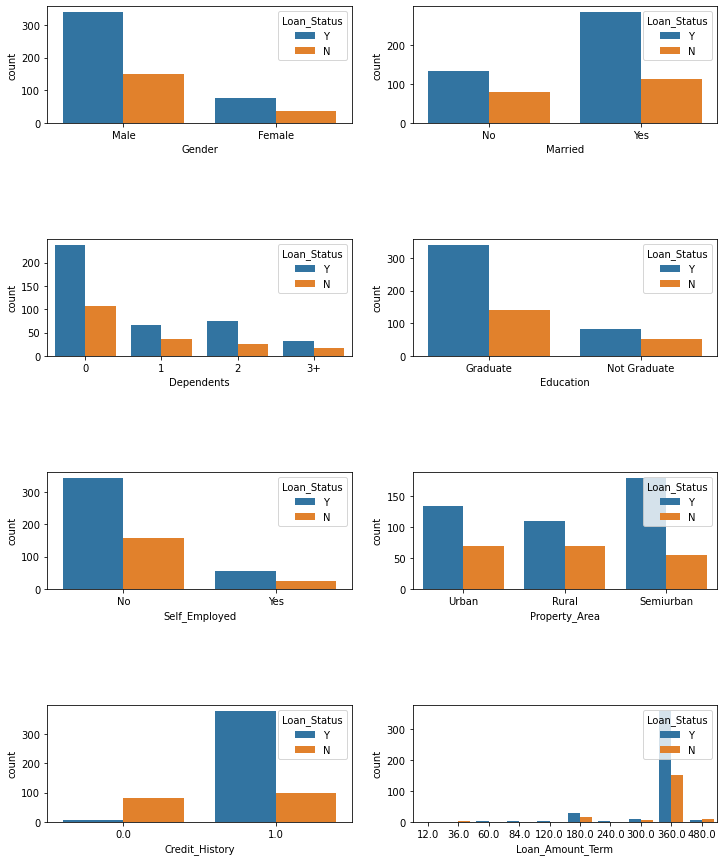

In [14]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(Categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


Observations:
    
    1.Loan Approval Status: About 2/3rd of applicants have been granted loan.
    
    2.Sex: There are more Men than Women (approx. 3x)
    
    3.Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
    
    4.Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
    
    5.Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
    
    6.Employment: 5/6th of population is not self employed.
    
    7.Property Area: More applicants from Semi-urban and also likely to be granted loans.
    
    8.Applicant with credit history are far more likely to be accepted.
    
    9.Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).
    
    10.Now, let's also analyze Numerical Columns:

# Preprocessing Data:

Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

    1.Encoding the Categorical Values.
    2.Imputing missing values

# Label Encoder
we use labele Encoder for changing types of object data type to int datatype

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [17]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [20]:
X=df.drop('Loan_Status', axis=1)

In [21]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [22]:
import numpy as np
 
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
 
# Imputer object using the mean strategy and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
 
data=df
 
print("Original Data : \n", data)
# Fitting the data to the imputer object
imputer = imputer.fit(data)
 
# Imputing the data    
data = imputer.transform(data)
 
print("Imputed Data : \n", data)

Original Data : 
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmoun

In [23]:
data

array([[1., 0., 0., ..., 1., 2., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 2., 1.],
       ...,
       [1., 1., 1., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [25]:
# creating the DataFrame
df1 = pd.DataFrame(data) 

In [26]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [27]:
df1.columns =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']

In [28]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


# Now use subplot and displot to check data are normalised or not.

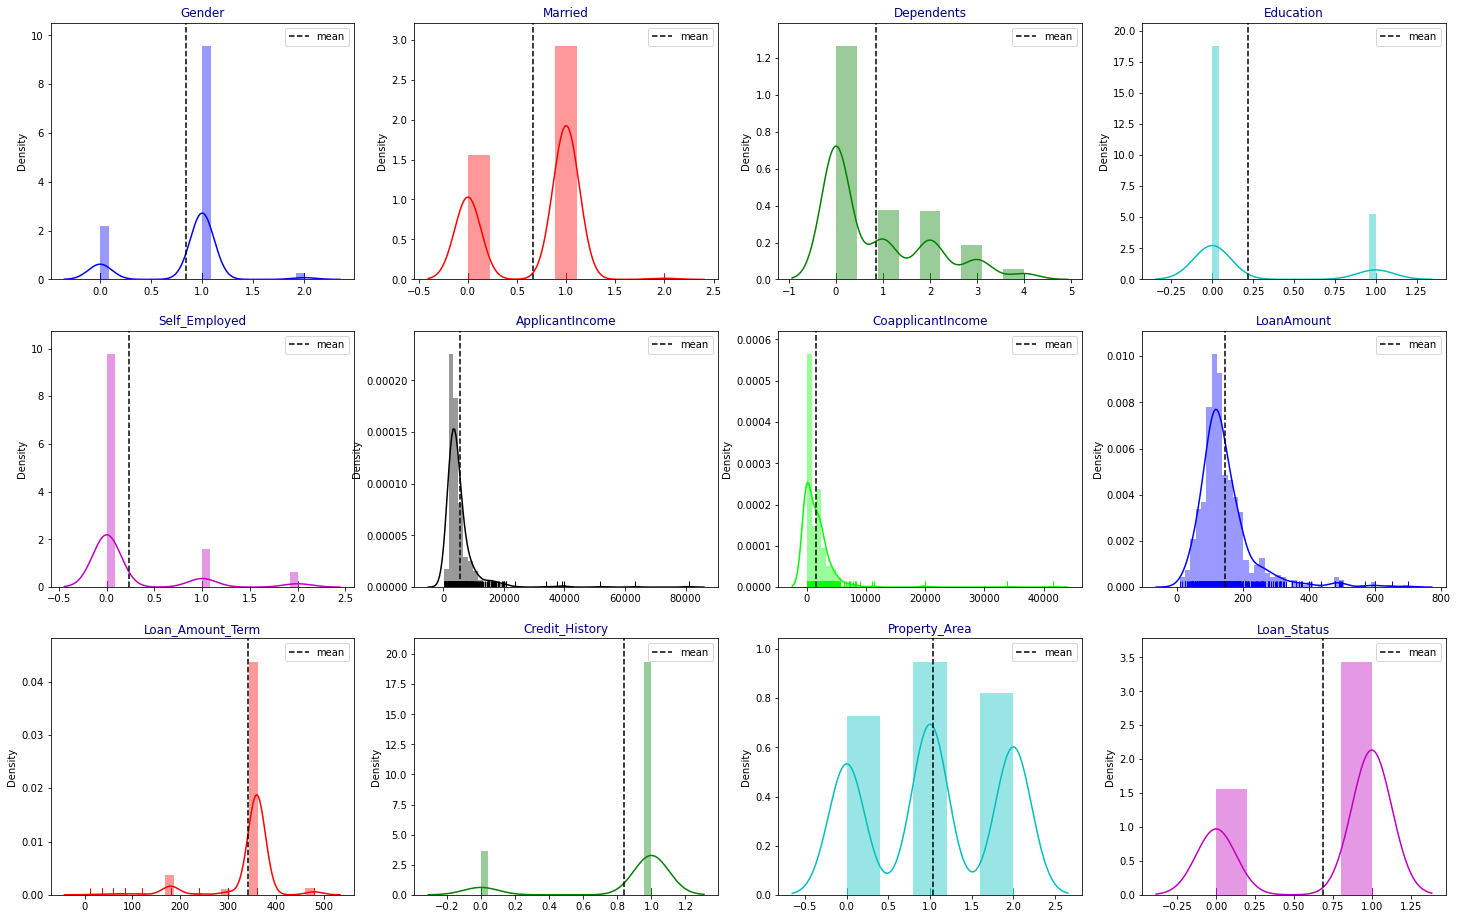

In [30]:
import itertools
import matplotlib.pyplot as plt
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

    1. From above plotting of distribution plot we see that some features columns are not normally distributed.
    
    2. some columns are skewed towards right.
    
    3. Building blocks are out of the normal curve hence outliers are present.

# CORRELATION BETWEEN THE COLUMNS:

In [31]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,0.052701,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


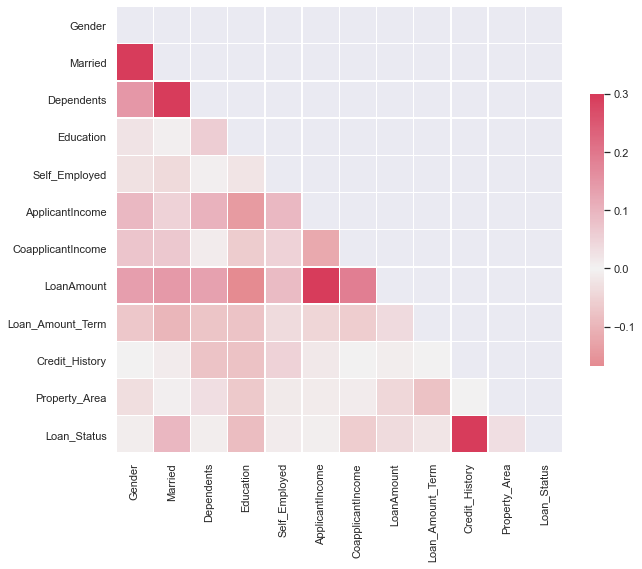

In [32]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df1.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

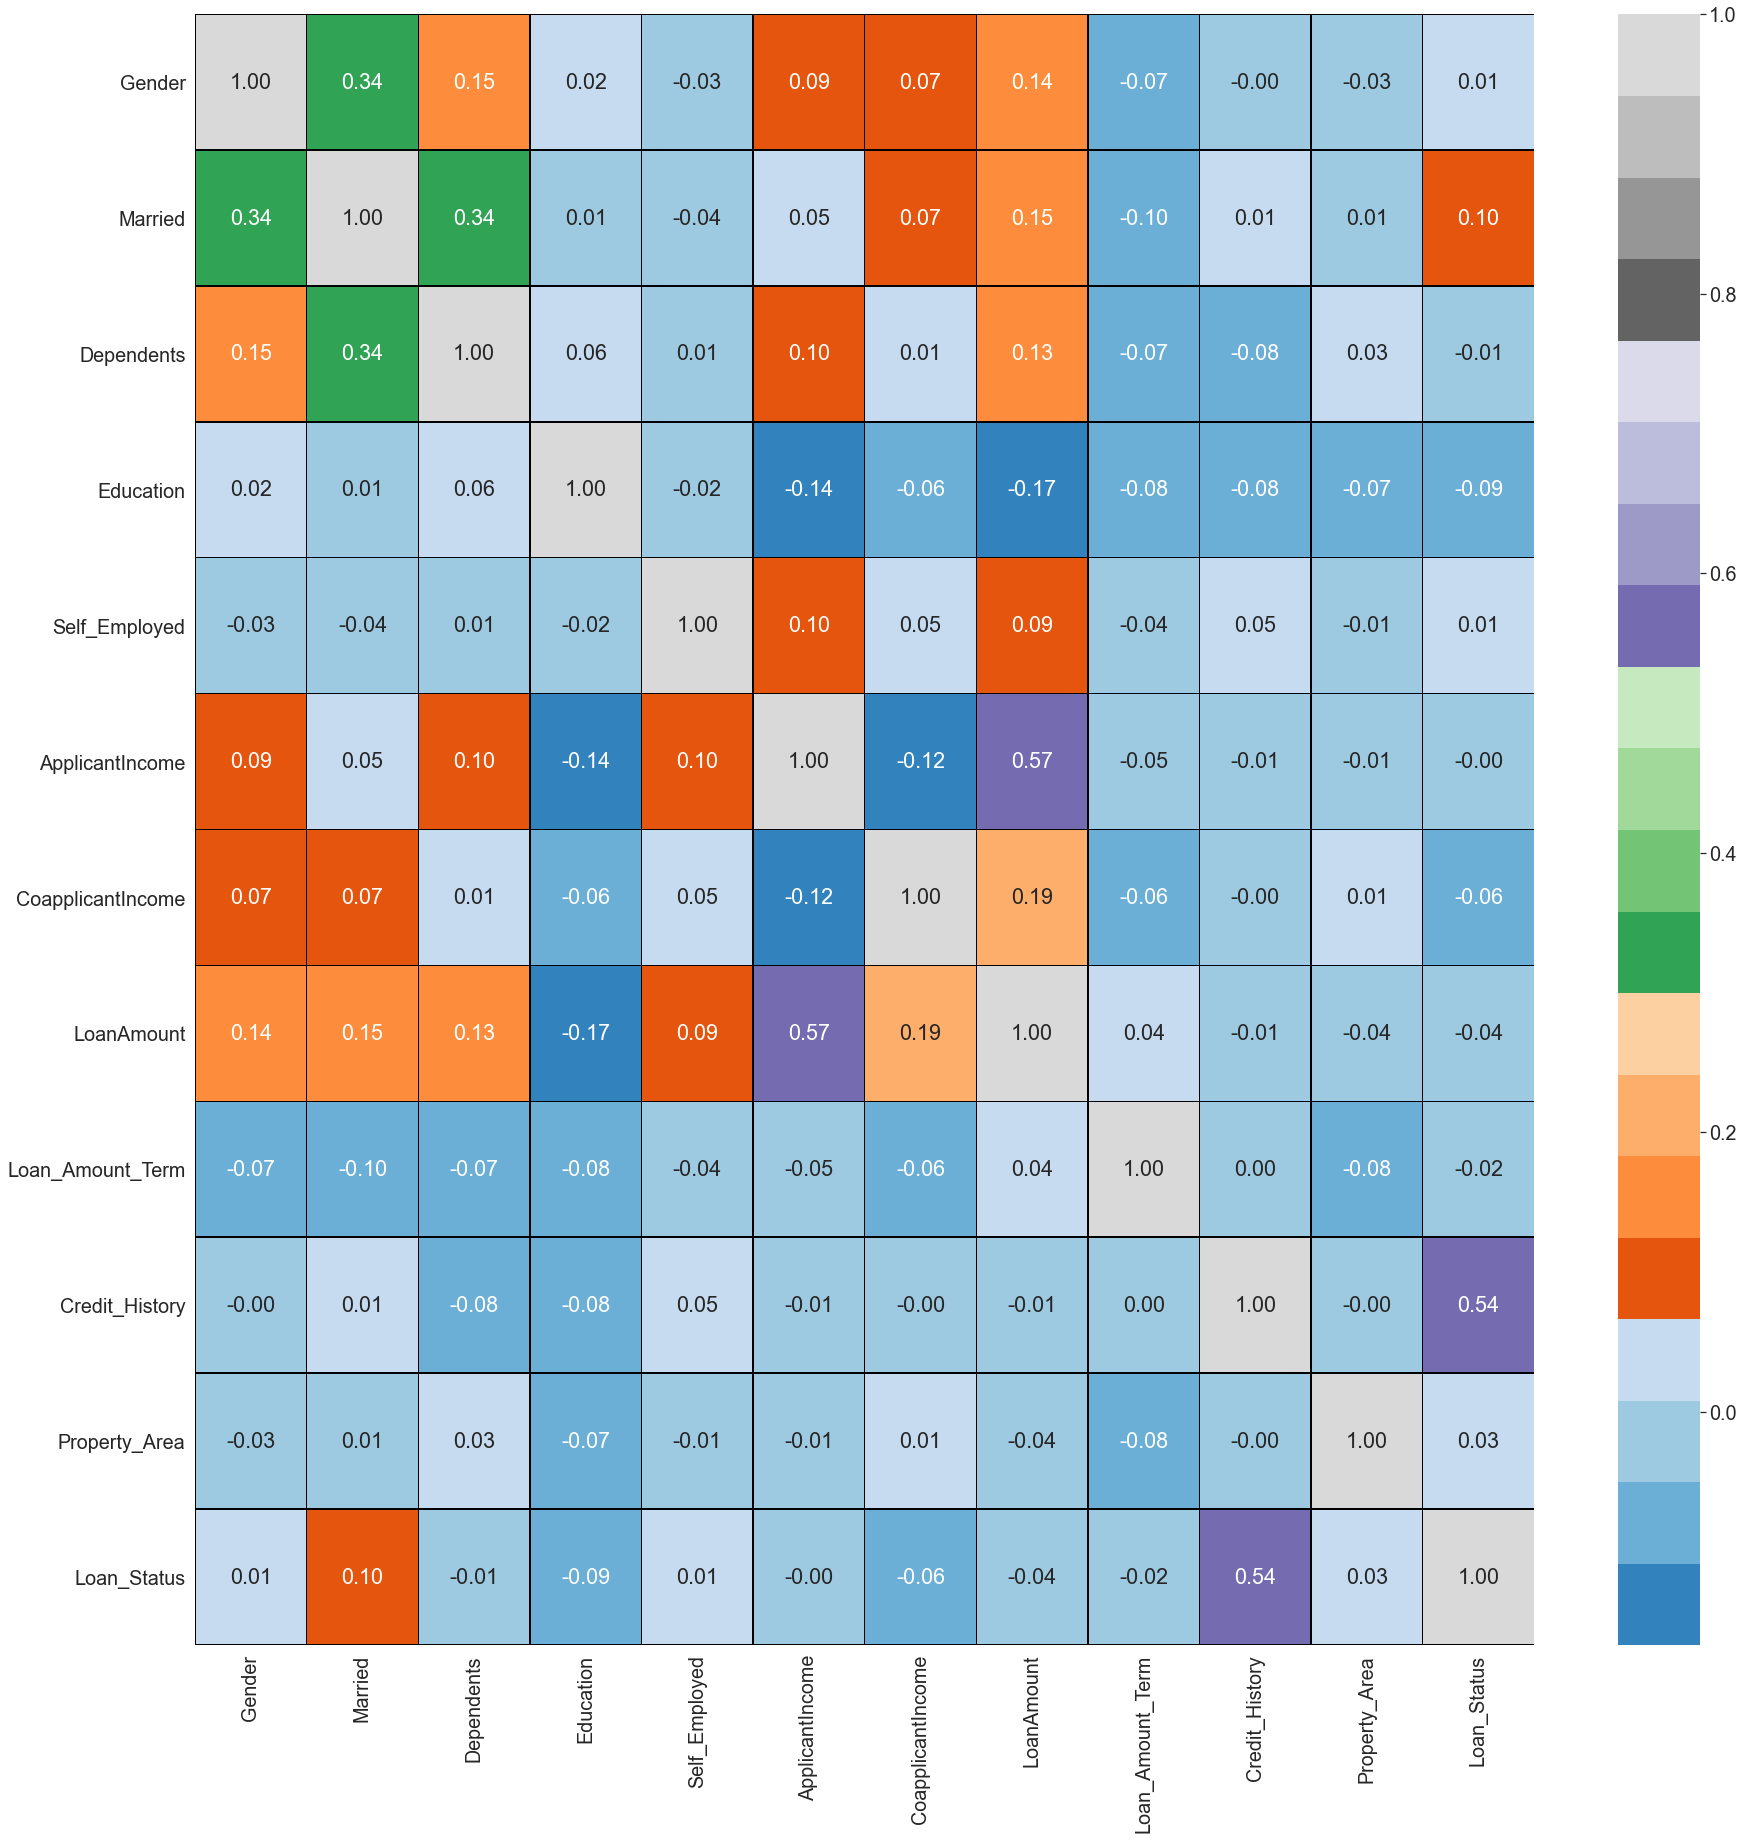

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="tab20c")

Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.




The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Discription of dataset


In [34]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# PLOTTING THE DISCRIPTION OF DATASET

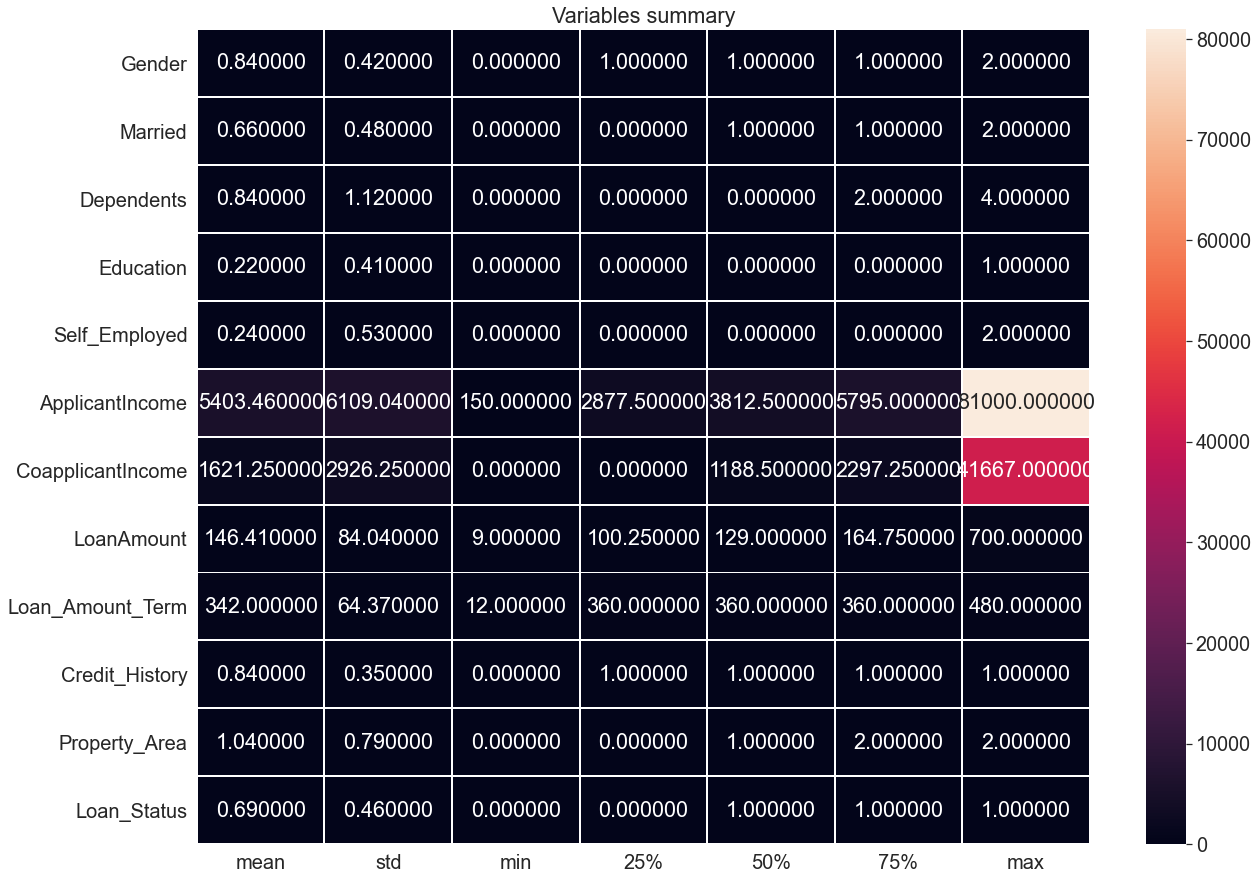

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Variables summary")
sns.set(font_scale=1.5)
plt.show()


From above ploting we can easily look at mean,std-deviation,min and max values of each columns,it helps in further data cleaning.

In [36]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
x=df1.drop('Loan_Status', axis=1)

In [39]:
x.shape

(614, 11)

In [40]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0


In [41]:
y=df["Loan_Status"]

In [42]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [43]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [44]:
vif_calc()

    VIF Factor           features
0     5.366987             Gender
1     3.563400            Married
2     1.811344         Dependents
3     1.299684          Education
4     1.219426      Self_Employed
5     2.896716    ApplicantIncome
6     1.482166  CoapplicantIncome
7     6.812097         LoanAmount
8    10.228162   Loan_Amount_Term
9     6.038654     Credit_History
10    2.575279      Property_Area


In [45]:
df = df1.drop(['Loan_Amount_Term'], axis=1)

we drop highly correlated columns..

In [46]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,1.0,2.0,1.0


we drop highly correlated columns..

# Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

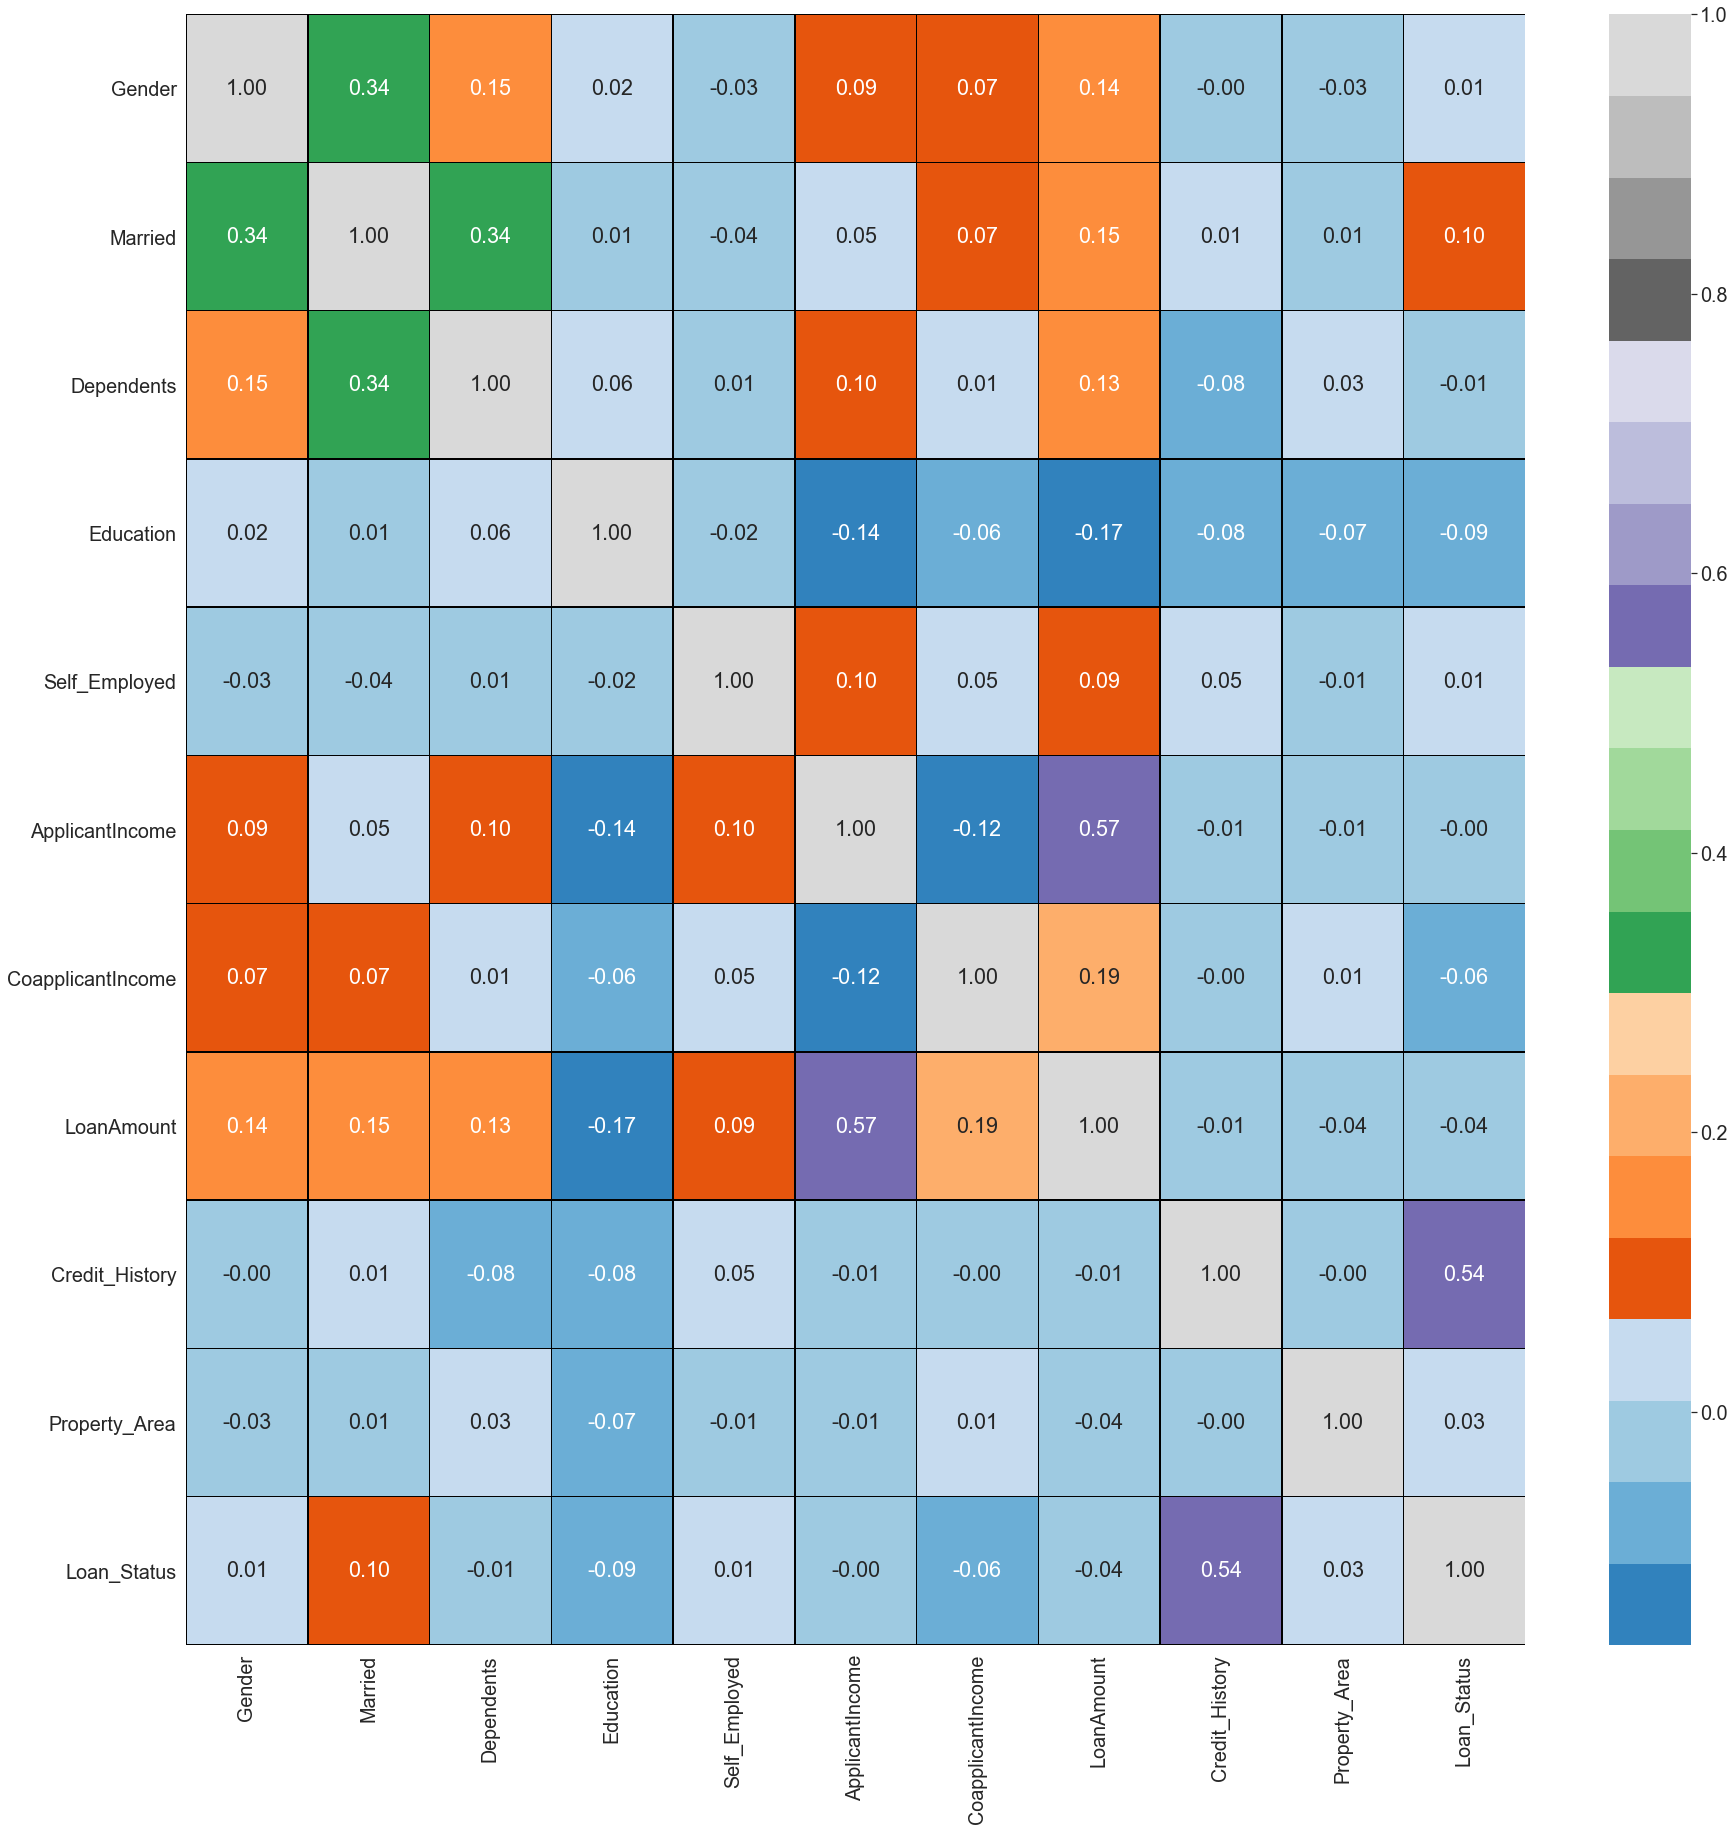

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap="tab20c")

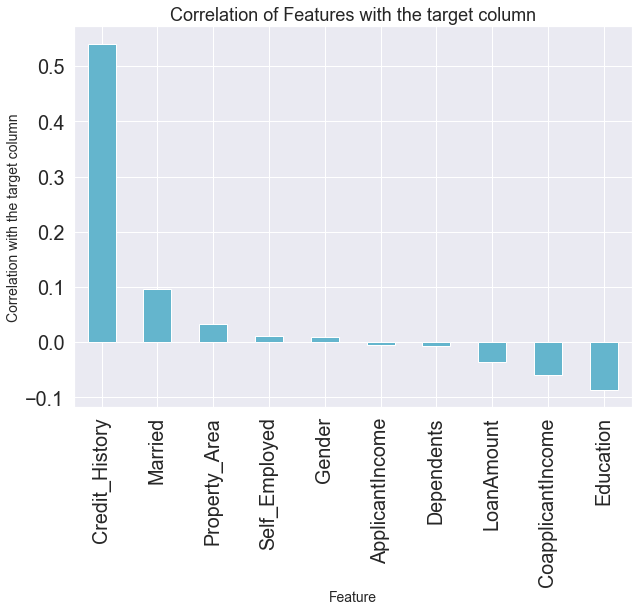

In [48]:
plt.figure(figsize=(10,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


Observations:

    1.Credit history is highly impacting feature column;Loan status is highly depend on individual credit history.
    
    2. Marriage status and property are the effective factors for passing the loan.
    
    3. Education is not that affecting the loan passing.

# Cheak the skewness:

In [49]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observations:
    1. Applicant Income & Coapplicant income is highly skewed feature column.
    lets plotting the same.

# Detecting outliers:

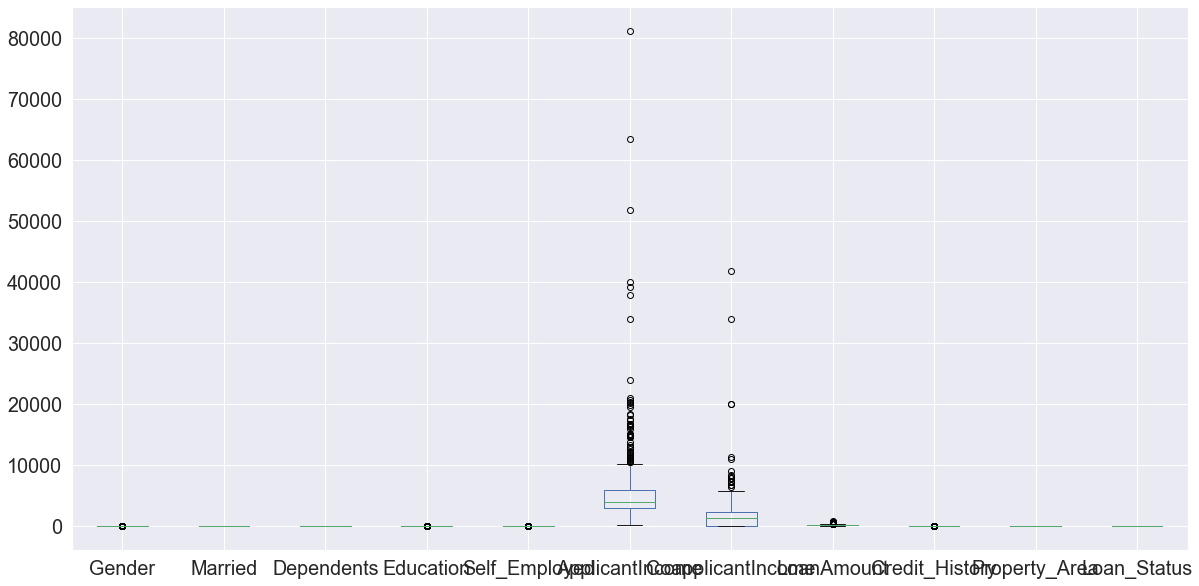

In [51]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1.2)

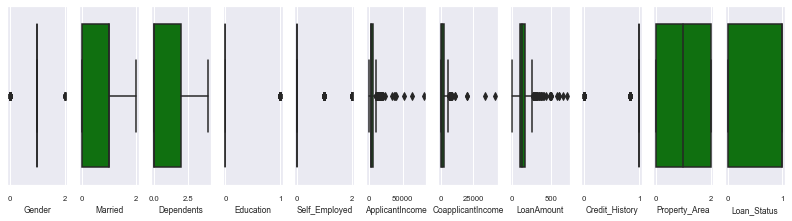

In [52]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
sns.set(font_scale=.7)
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


Observation:
    1. applicant income and co applicant income having maximum no of outliers

# Check the percentage of data falls under outliers:

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  11,  19,  24,  29,  30,  95, 107, 111, 114, 126, 130, 155,
        155, 158, 170, 171, 171, 177, 177, 183, 185, 218, 231, 236, 268,
        278, 295, 308, 333, 333, 333, 336, 344, 369, 374, 380, 385, 402,
        409, 411, 417, 432, 432, 443, 447, 463, 468, 487, 506, 523, 525,
        535, 542, 561, 579, 581, 600, 600, 601, 604], dtype=int64),
 array([6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 7, 5, 7, 4, 4, 5, 7, 6, 7, 5, 5,
        4, 4, 4, 4, 7, 4, 7, 4, 5, 7, 4, 4, 7, 4, 4, 4, 6, 5, 4, 6, 4, 7,
        5, 4, 4, 4, 7, 7, 7, 7, 4, 4, 7, 4, 6, 4, 6, 4, 7], dtype=int64))

In [54]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,1.0,2.0,1.0


In [55]:
df.shape

(614, 11)

In [56]:
df_new.shape

(560, 11)

In [57]:
percentage_loss=((614-560)/614)*100
print(percentage_loss)

8.794788273615636


observations:

    1.The data loss is 8.79 percentile,which is under 10% so we go for further data cleaning.

# Split the dataset in input columns and target columns..

In [58]:
x=df.drop('Loan_Status', axis=1)

In [59]:
y=df["Loan_Status"]

# Removing skewness by transforming data.

In [60]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.31016067, -1.33546089, -0.86375503, ...,  0.23538679,
         0.51406263,  1.1935668 ],
       [ 0.31016067,  0.68470219,  0.73114185, ..., -0.0376586 ,
         0.51406263, -1.35000343],
       [ 0.31016067,  0.68470219, -0.86375503, ..., -1.34630531,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.31016067,  0.68470219,  0.73114185, ...,  1.37240931,
         0.51406263,  1.1935668 ],
       [ 0.31016067,  0.68470219,  1.23034579, ...,  0.73892362,
         0.51406263,  1.1935668 ],
       [-1.80965324, -1.33546089, -0.86375503, ...,  0.03993645,
        -2.2471956 ,  0.00236103]])

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.31016067, -1.33546089, -0.86375503, ...,  0.23538679,
         0.51406263,  1.1935668 ],
       [ 0.31016067,  0.68470219,  0.73114185, ..., -0.0376586 ,
         0.51406263, -1.35000343],
       [ 0.31016067,  0.68470219, -0.86375503, ..., -1.34630531,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.31016067,  0.68470219,  0.73114185, ...,  1.37240931,
         0.51406263,  1.1935668 ],
       [ 0.31016067,  0.68470219,  1.23034579, ...,  0.73892362,
         0.51406263,  1.1935668 ],
       [-1.80965324, -1.33546089, -0.86375503, ...,  0.03993645,
        -2.2471956 ,  0.00236103]])

# Since the column has binary variable we will use logistic classification model
Regressor Model Building:

# Logistic Regression:

In [63]:
df.Loan_Status.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

Observations:
    since tha data is highly inbalanced we have to balance it using impalanced learn.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [67]:
np.bincount(y)

array([192, 422], dtype=int64)

In [68]:
y_train.value_counts()

0.0    422
1.0    422
Name: Loan_Status, dtype: int64

In [69]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print("At random state",i," The model performs very well")
    print("At random_state:-",i)
    print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 0  The model performs very well
At random_state:- 0
Training accuracy_score is:- 78.81873727087576
Testing accuracy_score is:- 81.30081300813008
At random state 1  The model performs very well
At random_state:- 1
Training accuracy_score is:- 78.61507128309573
Testing accuracy_score is:- 82.11382113821138
At random state 2  The model performs very well
At random_state:- 2
Training accuracy_score is:- 80.85539714867616
Testing accuracy_score is:- 75.60975609756098
At random state 3  The model performs very well
At random_state:- 3
Training accuracy_score is:- 78.61507128309573
Testing accuracy_score is:- 80.48780487804879
At random state 4  The model performs very well
At random_state:- 4
Training accuracy_score is:- 79.63340122199592
Testing accuracy_score is:- 77.23577235772358
At random state 5  The model performs very well
At random_state:- 5
Training accuracy_score is:- 79.0224032586558
Testing accuracy_score is:- 78.86178861788618
At random state 6  The model perfor

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20)

In [71]:
x_train.shape

(491, 10)

In [72]:
y_train.shape

(491,)

In [73]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8699186991869918

In [74]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.13008130081300814
Mean Squared Error: 0.13008130081300814
Root Mean Square Error: 0.3606678538669729


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.64      0.72        33
         1.0       0.88      0.96      0.91        90

    accuracy                           0.87       123
   macro avg       0.86      0.80      0.82       123
weighted avg       0.87      0.87      0.86       123



In [76]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 78.99022801302932
accuracy_score is :- 86.99186991869918


At cv:- 3
Cross validation score is :- 78.66889845369043
accuracy_score is :- 86.99186991869918


At cv:- 4
Cross validation score is :- 78.99371869960106
accuracy_score is :- 86.99186991869918


At cv:- 5
Cross validation score is :- 78.8298014127682
accuracy_score is :- 86.99186991869918


At cv:- 6
Cross validation score is :- 78.9929564058633
accuracy_score is :- 86.99186991869918


At cv:- 7
Cross validation score is :- 78.99873115390356
accuracy_score is :- 86.99186991869918


At cv:- 8
Cross validation score is :- 79.16310663021189
accuracy_score is :- 86.99186991869918


At cv:- 9
Cross validation score is :- 79.31940892298948
accuracy_score is :- 86.99186991869918




In [77]:
rscore=cross_val_score(lr,x,y,cv=9)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 79.31940892298948
accuracy_score is :- 86.99186991869918


In [78]:
lrs*100

86.99186991869918

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[21 12]
 [ 4 86]]
0.8699186991869918
              precision    recall  f1-score   support

         0.0       0.84      0.64      0.72        33
         1.0       0.88      0.96      0.91        90

    accuracy                           0.87       123
   macro avg       0.86      0.80      0.82       123
weighted avg       0.87      0.87      0.86       123



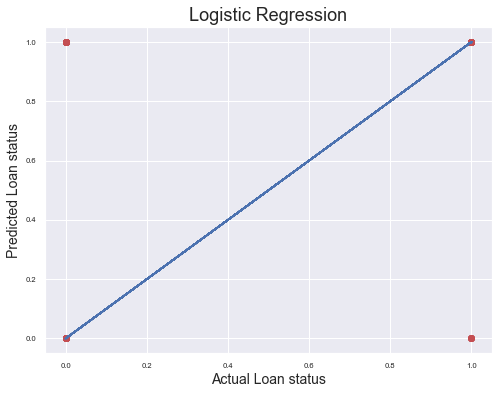

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Loan status',fontsize=14)
plt.ylabel('Predicted Loan status',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [82]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds = r2_score(y_test,pred_rd)
for j in range(2,10):
    rds = r2_score(y_test,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 42.02020202020202
Cross Val Score: 81.10749185667753
At cv:- 3
R2 Score: 42.02020202020202
Cross Val Score: 80.45911047345768
At cv:- 4
R2 Score: 42.02020202020202
Cross Val Score: 80.29772515066634
At cv:- 5
R2 Score: 42.02020202020202
Cross Val Score: 80.9462881514061
At cv:- 6
R2 Score: 42.02020202020202
Cross Val Score: 80.94739513928548
At cv:- 7
R2 Score: 42.02020202020202
Cross Val Score: 81.11471861471861
At cv:- 8
R2 Score: 42.02020202020202
Cross Val Score: 80.95095693779905
At cv:- 9
R2 Score: 42.02020202020202
Cross Val Score: 80.9462915601023


In [84]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.11382113821138211
Mean Squared Error: 0.11382113821138211
Root Mean Square Error: 0.3373738848983159


In [85]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.8861788617886179
[[19 14]
 [ 0 90]]
              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73        33
         1.0       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



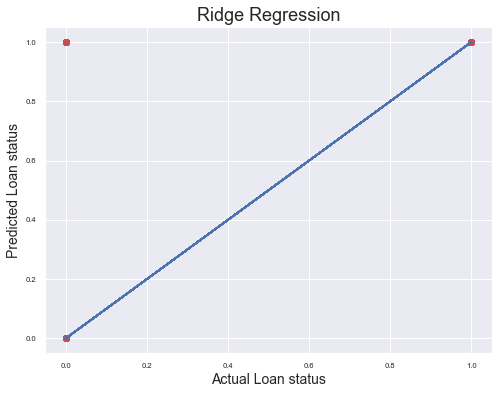

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Loan status',fontsize=14)
plt.ylabel('Predicted Loan status',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
DecisionTreeClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [115]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features = 'log2')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(y_test,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: -44.94949494949494
Cross Val Score: 70.19543973941367
At cv:- 3
R2 Score: -44.94949494949494
Cross Val Score: 71.66268133269568
At cv:- 4
R2 Score: -44.94949494949494
Cross Val Score: 71.82115270350565
At cv:- 5
R2 Score: -44.94949494949494
Cross Val Score: 72.30574436891911
At cv:- 6
R2 Score: -44.94949494949494
Cross Val Score: 70.3455168475157
At cv:- 7
R2 Score: -44.94949494949494
Cross Val Score: 70.21010598596806
At cv:- 8
R2 Score: -44.94949494949494
Cross Val Score: 70.18754272043746
At cv:- 9
R2 Score: -44.94949494949494
Cross Val Score: 69.05607653689495


In [116]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:
Mean Absolute Error: 0.2845528455284553
Mean Squared Error: 0.2845528455284553
Root Mean Square Error: 0.5334349496690812


In [117]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7154471544715447
[[22 11]
 [24 66]]
              precision    recall  f1-score   support

         0.0       0.48      0.67      0.56        33
         1.0       0.86      0.73      0.79        90

    accuracy                           0.72       123
   macro avg       0.67      0.70      0.67       123
weighted avg       0.76      0.72      0.73       123



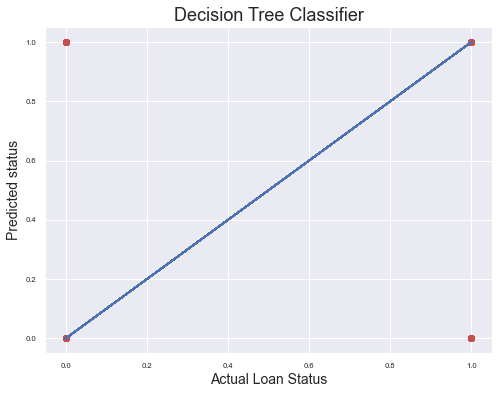

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Loan Status',fontsize=14)
plt.ylabel('Predicted status',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


In [93]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(y_test,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 33.737373737373744
Cross Val Score: 78.50162866449512
At cv:- 3
R2 Score: 33.737373737373744
Cross Val Score: 78.33811573409851
At cv:- 4
R2 Score: 33.737373737373744
Cross Val Score: 78.8303200067906
At cv:- 5
R2 Score: 33.737373737373744
Cross Val Score: 79.48287351725976
At cv:- 6
R2 Score: 33.737373737373744
Cross Val Score: 79.47839329906719
At cv:- 7
R2 Score: 33.737373737373744
Cross Val Score: 79.8122854157337
At cv:- 8
R2 Score: 33.737373737373744
Cross Val Score: 79.81245727956254
At cv:- 9
R2 Score: 33.737373737373744
Cross Val Score: 79.47807142180542


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))


Error:
Mean Absolute Error: 0.13008130081300814
Mean Squared Error: 0.13008130081300814
Root Mean Square Error: 0.3606678538669729


In [95]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.8699186991869918
[[20 13]
 [ 3 87]]
              precision    recall  f1-score   support

         0.0       0.87      0.61      0.71        33
         1.0       0.87      0.97      0.92        90

    accuracy                           0.87       123
   macro avg       0.87      0.79      0.82       123
weighted avg       0.87      0.87      0.86       123



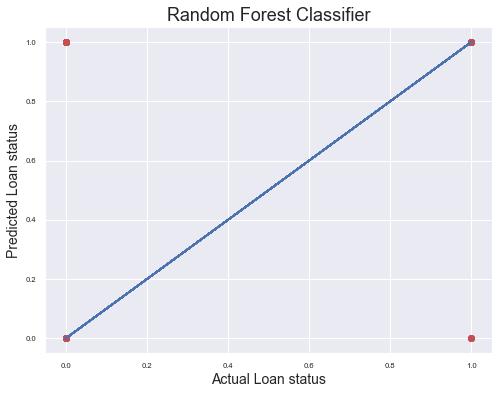

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Loan status',fontsize=14)
plt.ylabel('Predicted Loan status',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# Support Vector Classifier

In [97]:
from sklearn.svm import SVC


parameters = {'kernel':['linear', 'poly', 'rbf'],'gamma':['scale', 'auto'],'cache_size':[50,100,200,300] }
sc = SVC()
clf = GridSearchCV(sc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [98]:
sv = SVC(kernel='poly',gamma='scale',cache_size=50)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_support = sv.predict(x_test)

svs = r2_score(y_test,pred_support)
print('R2 Score:',rfs*100)

svscore = cross_val_score(sv,x,y,cv=2)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 33.737373737373744
Cross Val Score: 80.13029315960912


In [99]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_support))
print('Mean Squared Error:',mean_squared_error(y_test,pred_support))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_support)))


Error:
Mean Absolute Error: 0.13008130081300814
Mean Squared Error: 0.13008130081300814
Root Mean Square Error: 0.3606678538669729


In [100]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8699186991869918
[[19 14]
 [ 2 88]]
              precision    recall  f1-score   support

         0.0       0.90      0.58      0.70        33
         1.0       0.86      0.98      0.92        90

    accuracy                           0.87       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.87      0.87      0.86       123



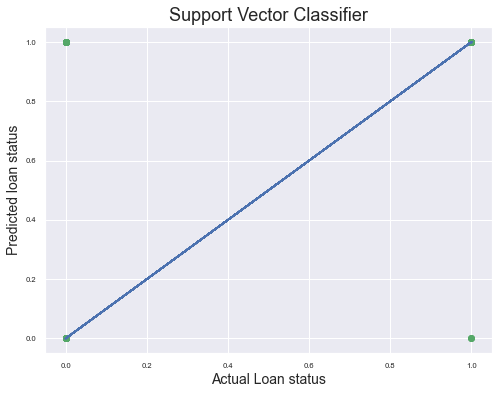

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Loan status',fontsize=14)
plt.ylabel('Predicted loan status',fontsize=14)
plt.title('Support Vector Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}


In [103]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform',n_neighbors=20)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)

kns = r2_score(y_test,pred_k)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=4)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 33.737373737373744
Cross Val Score: 1.6059757236227825


In [104]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.13008130081300814
Mean Squared Error: 0.13008130081300814
Root Mean Square Error: 0.3606678538669729


In [105]:
print(accuracy_score(y_test,pred_support))
print(confusion_matrix(y_test,pred_support))
print(classification_report(y_test,pred_support))

0.8699186991869918
[[19 14]
 [ 2 88]]
              precision    recall  f1-score   support

         0.0       0.90      0.58      0.70        33
         1.0       0.86      0.98      0.92        90

    accuracy                           0.87       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.87      0.87      0.86       123



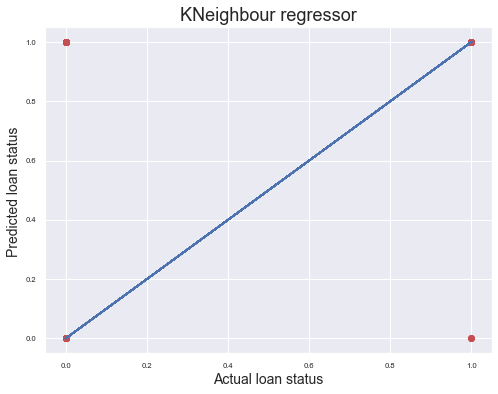

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_support, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual loan status',fontsize=14)
plt.ylabel('Predicted loan status ',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


# Plotting Auc-Roc curve..with logistic regression prediction..

We tested 6 models out of which Logistic Regression performing good:
plotting Auc-Roc curve..with logistic regression prediction..

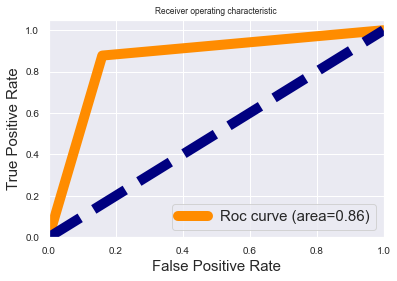

In [132]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=15)
plt.show()

# Conclusion

In [133]:
import numpy as np
a=np.array(y_test)
a

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0.])

In [134]:
predicted=np.array(pred_test)
predicted

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1.])

In [135]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [136]:
df_com

,original,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
118,1.0,1.0
119,1.0,1.0
120,1.0,0.0
121,1.0,1.0


In [137]:
df_com.sample(10)

,original,predicted
24,0.0,0.0
80,0.0,0.0
98,0.0,0.0
12,1.0,1.0
52,1.0,1.0
113,1.0,1.0
51,1.0,1.0
27,0.0,0.0
92,1.0,1.0
61,1.0,1.0


# The best model is Logistic regression as r2_score and cv is best from above tested models.

In [138]:
rscore=cross_val_score(lr,x,y,cv=8)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 79.31940892298948
accuracy_score is :- 86.99186991869918


Our Model performs with Accuracy Score 87%...

# Saving the best models with initials...using pickle library

In [139]:
import pickle
filename = 'Loan_Application_data_Prediction.pkl'
pickle.dump(lr, open(filename, 'wb'))